# Aim 
To understand the influence of various factors like economic, personal and social on the students performance

# Inferences 
1. How to improve the students performance in each test? 
2. What are the major factors influencing the test scores? 
3. Effectiveness of test preparation course? 
4. Other inferences

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Set minimum marks to pass 
passmark = 40

In [24]:
# Read the data file 
df = pd.read_csv('StudentsPerformance.csv')

In [25]:
df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
# Get size of data frame 
df.shape

(1000, 8)

In [27]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [28]:
# check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

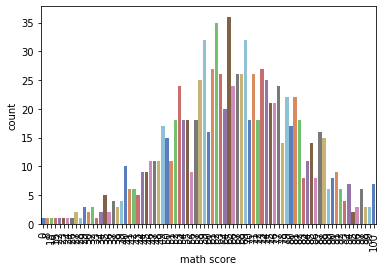

In [31]:
# Explore math score 
p = sns.countplot(x='math score', data = df, palette = 'muted')
_ = plt.setp(p.get_xticklabels(),rotation = 90)

In [35]:
# How many students passed in Math exam?
# np.where(condition, true, false)
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F','P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

In [43]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

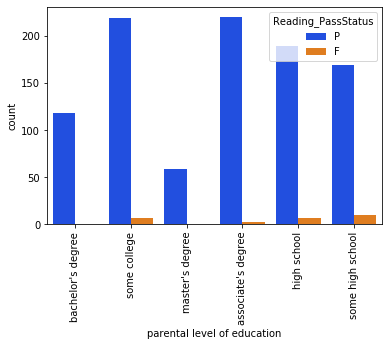

In [44]:
p = sns.countplot(x='parental level of education', data = df, hue = 'Reading_PassStatus',palette = 'bright')
_ = plt.setp(p.get_xticklabels(),rotation = 90)

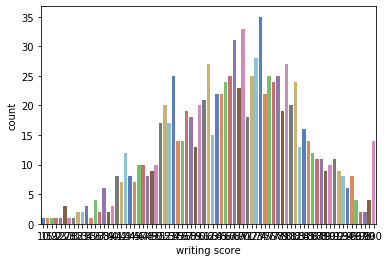

In [45]:
P = sns.countplot(x='writing score', data = df, palette = 'muted')
_ = plt.setp(p.get_xticklabels(),rotation=90)

In [46]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F','P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

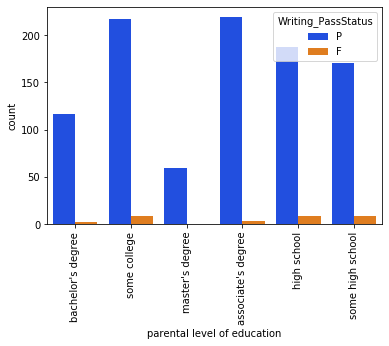

In [47]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [49]:
# Check how many students passed in all the subjects 
df['Overall_PassStatus'] = df.apply(lambda x: 'F' if x['Math_PassStatus'] == 'F'
                                   or x['Reading_PassStatus'] == 'F' 
                                   or x['Writing_PassStatus'] == 'F'
                                   else 'P', axis = 1)
df.Overall_PassStatus.value_counts()

P    949
F     51
Name: Overall_PassStatus, dtype: int64

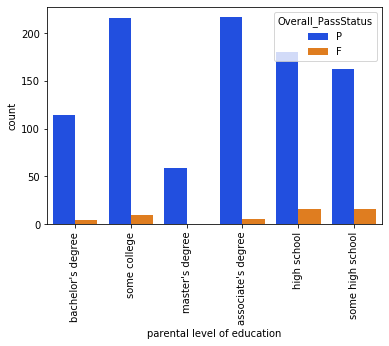

In [51]:
p = sns.countplot(x='parental level of education', data = df, hue='Overall_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [52]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

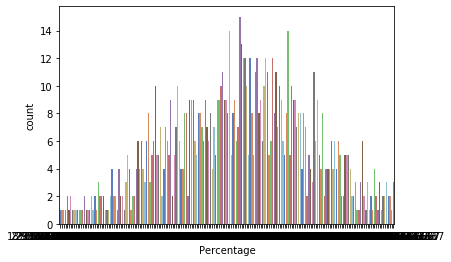

In [53]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0)

In [58]:
def GetGrade(Percentage, Overall_PassStatus):
    if ( Overall_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['Overall_PassStatus']), axis=1)

df.Grade.value_counts()


B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

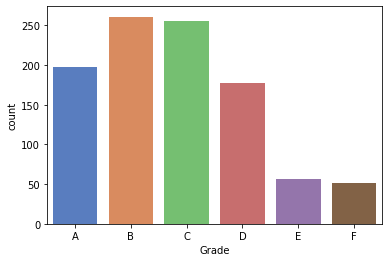

In [59]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

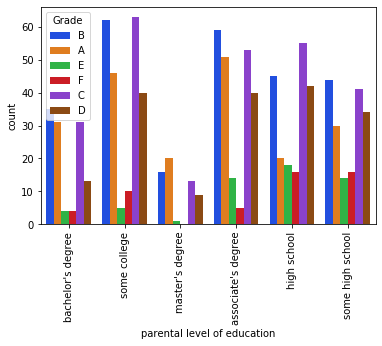

In [60]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 